In [76]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [77]:
import numpy as np
import pandas as pd

In [78]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [109]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

from flask import Flask, jsonify

In [80]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [81]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [82]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [83]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [84]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

1. Design a query to retrieve the last 12 months of precipitation data and plot the results

2. Calculate the date 1 year ago from the last data point in the database

3. Perform a query to retrieve the data and precipitation scores

4. Save the query results as a Pandas DataFrame and set the index to the date column

5. Sort the dataframe by date

6. Use Pandas Plotting with Matplotlib to plot the data


In [85]:
# Query to retrieve last 12 months of precipitation data. Last date of data is 2017-08-23 so retrieve from 2016-08-23.
precipitation_data = session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).filter(Measurement.date >='2016-07-23').all()
precipitation_data

[('USC00519397', '2016-07-23', 0.0, 78.0),
 ('USC00519397', '2016-07-24', 0.13, 79.0),
 ('USC00519397', '2016-07-25', 4.2, 78.0),
 ('USC00519397', '2016-07-26', 0.0, 80.0),
 ('USC00519397', '2016-07-27', 0.0, 80.0),
 ('USC00519397', '2016-07-28', 0.0, 80.0),
 ('USC00519397', '2016-07-29', 0.0, 79.0),
 ('USC00519397', '2016-07-30', 0.0, 78.0),
 ('USC00519397', '2016-07-31', 0.06, 76.0),
 ('USC00519397', '2016-08-01', 0.08, 77.0),
 ('USC00519397', '2016-08-02', 0.05, 78.0),
 ('USC00519397', '2016-08-03', 0.0, 80.0),
 ('USC00519397', '2016-08-04', 0.04, 80.0),
 ('USC00519397', '2016-08-05', 0.01, 80.0),
 ('USC00519397', '2016-08-06', 0.0, 80.0),
 ('USC00519397', '2016-08-07', 0.39, 77.0),
 ('USC00519397', '2016-08-08', 0.02, 81.0),
 ('USC00519397', '2016-08-09', 0.0, 80.0),
 ('USC00519397', '2016-08-10', 0.0, 80.0),
 ('USC00519397', '2016-08-11', 0.0, 80.0),
 ('USC00519397', '2016-08-12', 0.0, 79.0),
 ('USC00519397', '2016-08-13', 0.0, 79.0),
 ('USC00519397', '2016-08-14', 0.0, 79.0),
 ('

In [86]:
# Save query as a Pandas dataframe
precipitation_df = pd.DataFrame(precipitation_data, columns = ['Station', 'Date', 'Precipitation', 'Temperature'])
precipitation_df.head()

,Station,Date,Precipitation,Temperature
0,USC00519397,2016-07-23,0.00,78.0
1,USC00519397,2016-07-24,0.13,79.0
2,USC00519397,2016-07-25,4.20,78.0
3,USC00519397,2016-07-26,0.00,80.0
4,USC00519397,2016-07-27,0.00,80.0


In [87]:
# Make 'date' index of dataframe
precipitation_df.set_index('Date')

,Station,Precipitation,Temperature
Date,,,
2016-07-23,USC00519397,0.00,78.0
2016-07-24,USC00519397,0.13,79.0
2016-07-25,USC00519397,4.20,78.0
2016-07-26,USC00519397,0.00,80.0
2016-07-27,USC00519397,0.00,80.0
2016-07-28,USC00519397,0.00,80.0
2016-07-29,USC00519397,0.00,79.0
2016-07-30,USC00519397,0.00,78.0
2016-07-31,USC00519397,0.06,76.0


In [88]:
prcp_dates = precipitation_df['Date']

In [89]:
prcp_scores = precipitation_df['Precipitation']

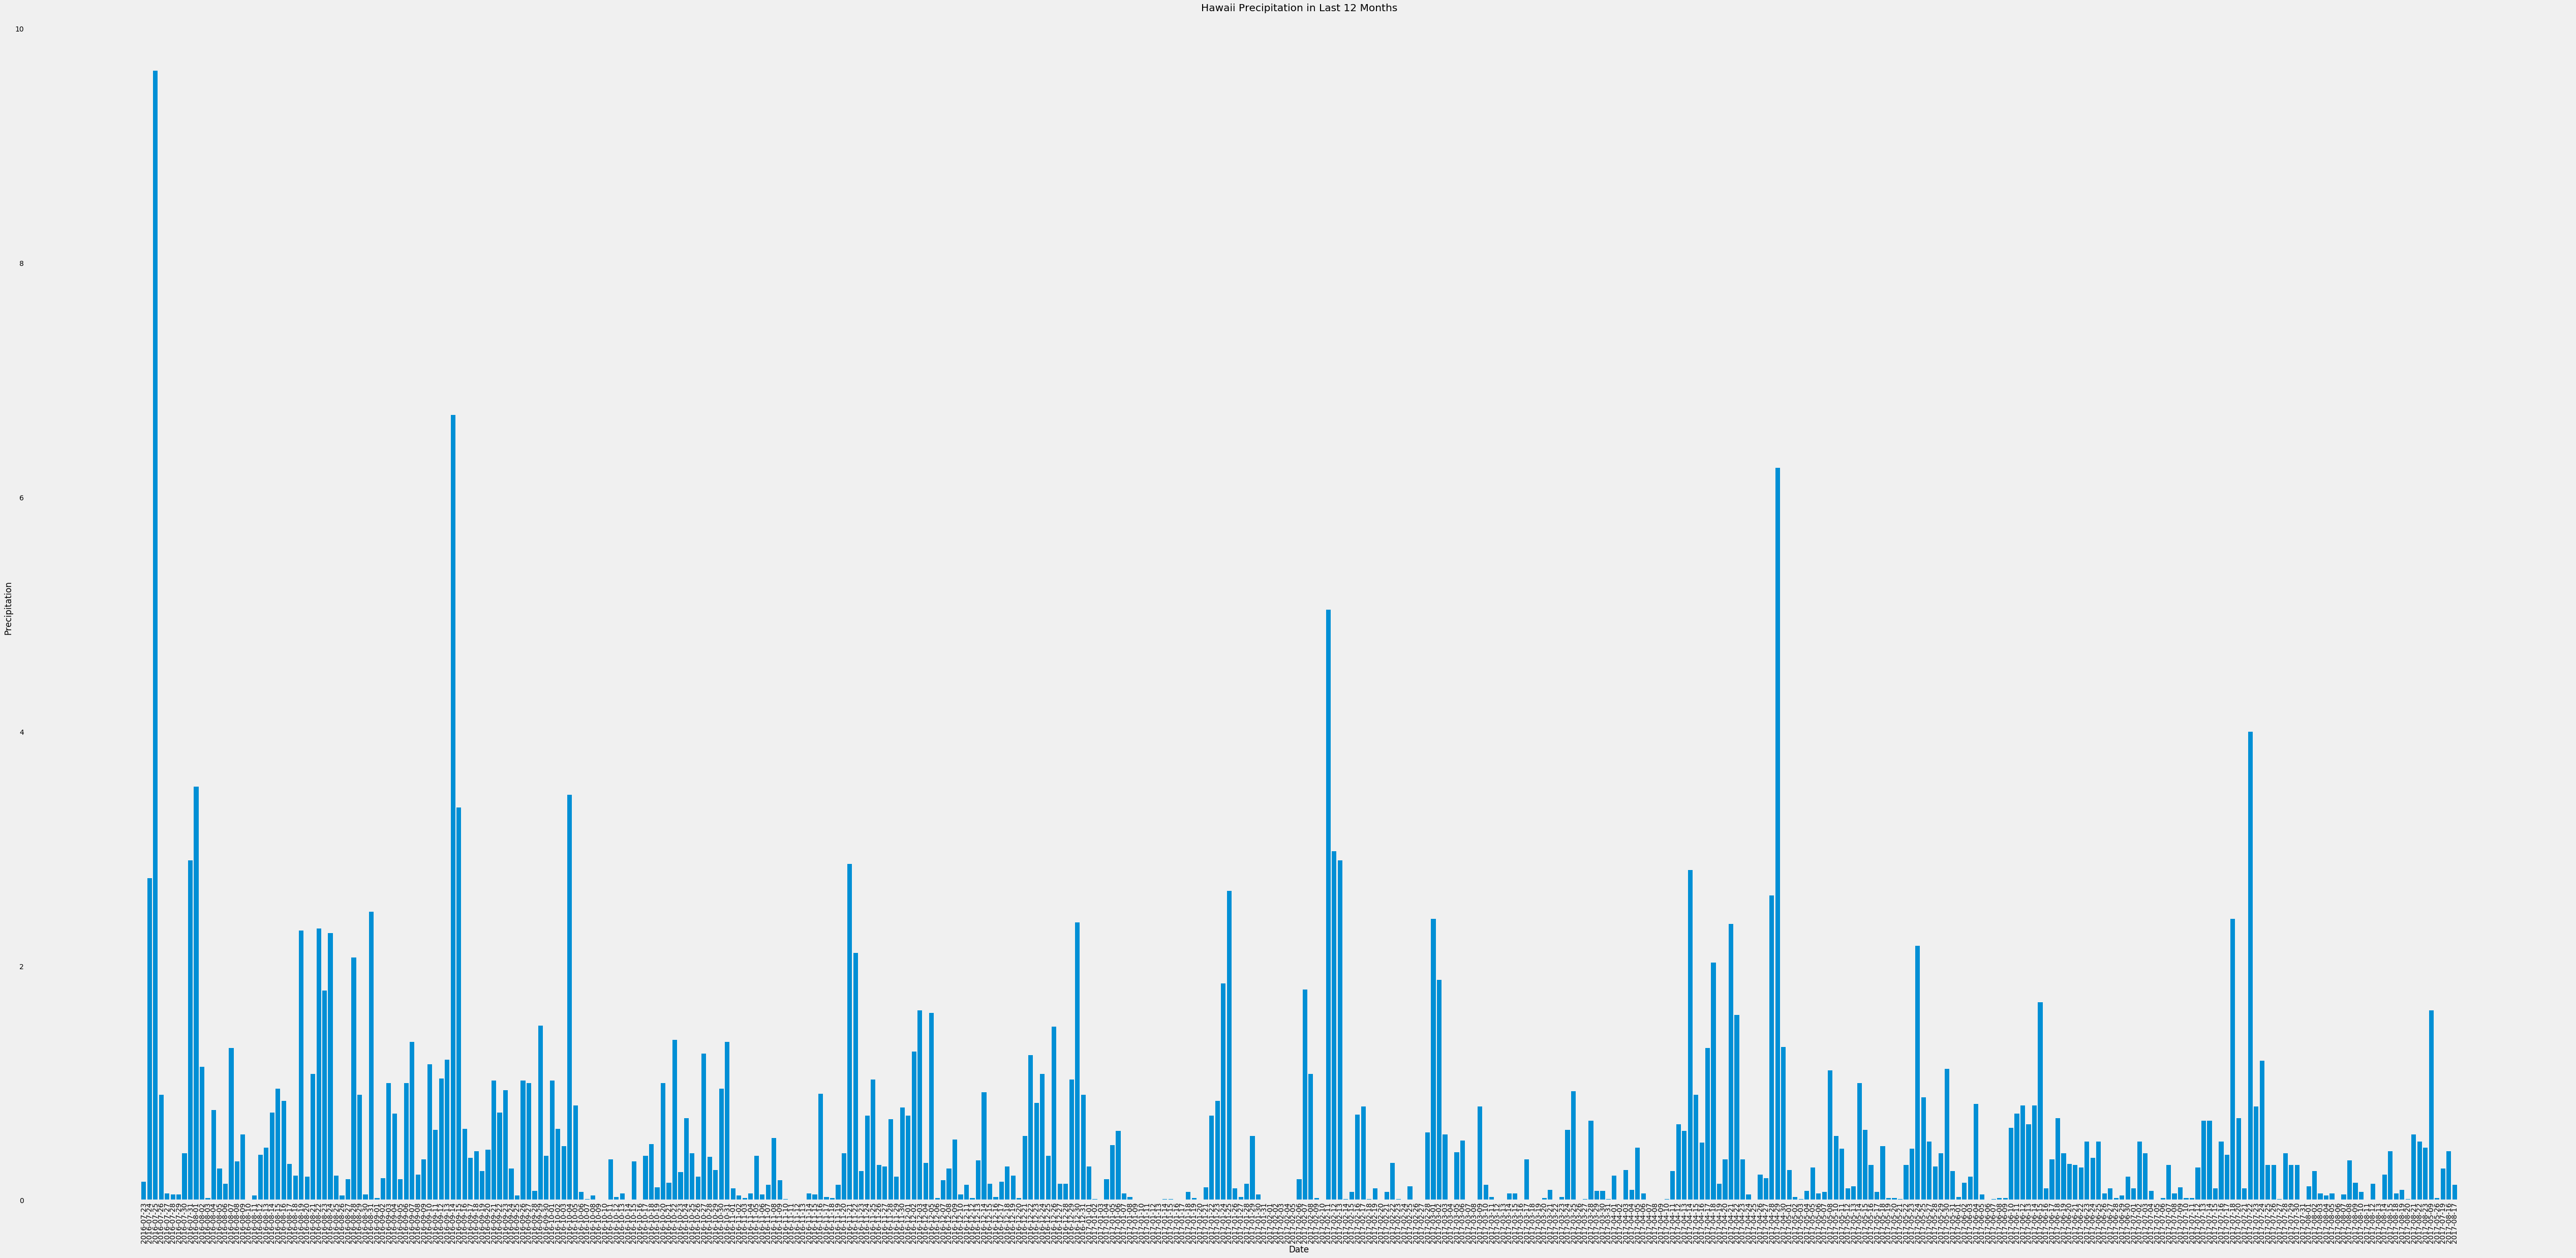

In [130]:
fig = plt.figure(figsize=(80,40))
plt.xticks(rotation=90)
plt.bar(prcp_dates, prcp_scores)
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Hawaii Precipitation in Last 12 Months')
plt.grid()
plt.show()
fig.savefig('12-months-precipitation.png', dpi=fig.dpi)

![precipitation](Images/precipitation.png)

In [91]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation,Temperature
count,2195.000000,2424.000000
mean,0.196907,74.874587
std,0.556862,4.586306
min,0.000000,58.000000
25%,0.000000,72.000000
50%,0.020000,76.000000
75%,0.140000,78.000000
max,9.640000,87.000000


In [92]:
# Query to retrieve all precipitation data
all_precipitation_data = session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).all()
all_precipitation_data

[('USC00519397', '2010-01-01', 0.08, 65.0),
 ('USC00519397', '2010-01-02', 0.0, 63.0),
 ('USC00519397', '2010-01-03', 0.0, 74.0),
 ('USC00519397', '2010-01-04', 0.0, 76.0),
 ('USC00519397', '2010-01-06', None, 73.0),
 ('USC00519397', '2010-01-07', 0.06, 70.0),
 ('USC00519397', '2010-01-08', 0.0, 64.0),
 ('USC00519397', '2010-01-09', 0.0, 68.0),
 ('USC00519397', '2010-01-10', 0.0, 73.0),
 ('USC00519397', '2010-01-11', 0.01, 64.0),
 ('USC00519397', '2010-01-12', 0.0, 61.0),
 ('USC00519397', '2010-01-14', 0.0, 66.0),
 ('USC00519397', '2010-01-15', 0.0, 65.0),
 ('USC00519397', '2010-01-16', 0.0, 68.0),
 ('USC00519397', '2010-01-17', 0.0, 64.0),
 ('USC00519397', '2010-01-18', 0.0, 72.0),
 ('USC00519397', '2010-01-19', 0.0, 66.0),
 ('USC00519397', '2010-01-20', 0.0, 66.0),
 ('USC00519397', '2010-01-21', 0.0, 69.0),
 ('USC00519397', '2010-01-22', 0.0, 67.0),
 ('USC00519397', '2010-01-23', 0.0, 67.0),
 ('USC00519397', '2010-01-24', 0.01, 71.0),
 ('USC00519397', '2010-01-25', 0.0, 67.0),
 ('USC

In [93]:
# Save query of all data as a Pandas dataframe
all_precipitation_df = pd.DataFrame(all_precipitation_data, columns = ['Station', 'Date', 'Precipitation', 'Temperature'])
all_precipitation_df.head()

,Station,Date,Precipitation,Temperature
0,USC00519397,2010-01-01,0.08,65.0
1,USC00519397,2010-01-02,0.00,63.0
2,USC00519397,2010-01-03,0.00,74.0
3,USC00519397,2010-01-04,0.00,76.0
4,USC00519397,2010-01-06,NaN,73.0


![describe](Images/describe.png)

In [94]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Measurement.station).distinct(Measurement.station).count()
station_count

9

In [95]:
# What are the most active stations? (i.e. what stations have the most rows)?
station_count_activity = all_precipitation_df.groupby("Station")['Date'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)
station_count_activity

,Station,Count
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [96]:
# Create a query for just the most active station
USC00519281 = session.query(Measurement.station, Measurement.date, Measurement.tobs).filter(Measurement.station=="USC00519281").all()
USC00519281

[('USC00519281', '2010-01-01', 70.0),
 ('USC00519281', '2010-01-02', 62.0),
 ('USC00519281', '2010-01-03', 74.0),
 ('USC00519281', '2010-01-04', 75.0),
 ('USC00519281', '2010-01-05', 74.0),
 ('USC00519281', '2010-01-06', 76.0),
 ('USC00519281', '2010-01-07', 69.0),
 ('USC00519281', '2010-01-08', 66.0),
 ('USC00519281', '2010-01-09', 70.0),
 ('USC00519281', '2010-01-10', 75.0),
 ('USC00519281', '2010-01-11', 64.0),
 ('USC00519281', '2010-01-12', 60.0),
 ('USC00519281', '2010-01-13', 61.0),
 ('USC00519281', '2010-01-14', 68.0),
 ('USC00519281', '2010-01-15', 64.0),
 ('USC00519281', '2010-01-16', 66.0),
 ('USC00519281', '2010-01-17', 67.0),
 ('USC00519281', '2010-01-18', 70.0),
 ('USC00519281', '2010-01-19', 67.0),
 ('USC00519281', '2010-01-20', 67.0),
 ('USC00519281', '2010-01-21', 69.0),
 ('USC00519281', '2010-01-22', 60.0),
 ('USC00519281', '2010-01-23', 75.0),
 ('USC00519281', '2010-01-24', 75.0),
 ('USC00519281', '2010-01-25', 65.0),
 ('USC00519281', '2010-01-26', 75.0),
 ('USC005192

In [97]:
# Using the station id from the previous query, calculate: lowest, highest and average temps
results_temp = session.query(Measurement.station, func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station=="USC00519281").all()
results_temp

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [98]:
# Identify the last day of observation at most active station 
USC00519281_last = session.query(Measurement.date, Measurement.tobs, func.max(Measurement.date)).filter(Measurement.station=="USC00519281").all()
USC00519281_last

[('2017-08-18', 79.0, '2017-08-18')]

In [99]:
# Choose the station with the highest number of temperature observations. Query the last 12 
#months of temperature observation data for this station and plot the results as a histogram
# Highest number of temp observations: USC00519281, date range: 2016-08-18 to 2017-08-18
USC00519281_temps = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station=="USC00519281").filter(Measurement.date >='2016-08-18').all()
USC00519281_temps

[('2016-08-18', 80.0),
 ('2016-08-19', 79.0),
 ('2016-08-20', 81.0),
 ('2016-08-21', 79.0),
 ('2016-08-22', 78.0),
 ('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-

In [100]:
# Save temp query as a Pandas dataframe
USC00519281_temp_df = pd.DataFrame(USC00519281_temps, columns = ['Date', 'Temperature'])
USC00519281_temp_df.head()

,Date,Temperature
0,2016-08-18,80.0
1,2016-08-19,79.0
2,2016-08-20,81.0
3,2016-08-21,79.0
4,2016-08-22,78.0


In [101]:
# Make 'date' index of dataframe
USC00519281_temp_df.set_index('Date')

,Temperature
Date,
2016-08-18,80.0
2016-08-19,79.0
2016-08-20,81.0
2016-08-21,79.0
2016-08-22,78.0
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0


In [119]:
tobs = USC00519281_temp_df['Temperature']

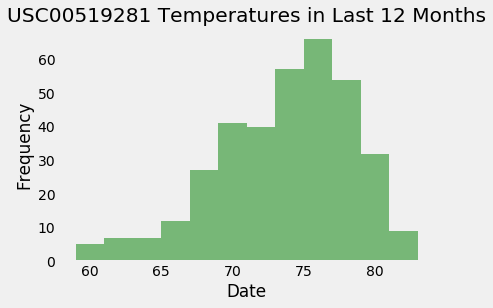

<Figure size 432x288 with 0 Axes>

In [122]:
plt.hist(tobs, bins=12, alpha=0.5, color='green')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('USC00519281 Temperatures in Last 12 Months')
plt.grid()
plt.show()
plt.savefig('USC00519281-temps.png')

## ROUTES

In [104]:
# Combine station and measurement data into one dataset
measurement_loc = "hawaii_measurements.csv"
station_loc = "hawaii_stations.csv"

In [105]:
# Read the files
measurement_data = pd.read_csv(measurement_loc)
station_data = pd.read_csv(station_loc)

In [106]:
# Combine into one dataset
combined_data = pd.merge(measurement_data, station_data, how="outer", on="station")
combined_data.head()

,station,date,prcp,tobs,name,latitude,longitude,elevation
0,USC00519397,2010-01-01,0.08,65,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,USC00519397,2010-01-02,0.00,63,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,USC00519397,2010-01-03,0.00,74,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,USC00519397,2010-01-04,0.00,76,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,USC00519397,2010-01-06,NaN,73,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0


## Step 2 - Climate App

Now that you have completed your initial analysis, design a Flask API based on the queries that you have just developed.

* Use FLASK to create your routes.

In [110]:
# `/`
# Home page: List all routes that are available.
app = Flask(__name__)

@app.route("/")
def homepage():
    return (
    f"- /api/v1.0/precipitation<br/>"
    f"- /api/v1.0/stations<br/>"
    f"- /api/v1.0/tobs<br/>"
    f"- /api/v1.0/temp/start/end<br/>"  
    )

In [111]:
# `/api/v1.0/precipitation`
# Convert the query results to a Dictionary using `date` as the key and `prcp` as the value.
# Return the JSON representation of your dictionary.

@app.route('/api/v1.0/precipitation')
def precipitation():
    prcp_data = session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).filter(Measurement.date >='2016-08-23').all()
    prcp_data
    
    # Convert to dataframe
    prcp_df = pd.DataFrame(prcp_data)
    
    # Dictionary
    prcp_df_dict = prcp_df.to_dict('records')
    
    # Send back to client
    return jsonify(prcp_df_dict)

In [112]:
# `/api/v1.0/stations`
# Return a JSON list of stations from the dataset.

@app.route('/api/v1.0/stations')
def stations():
    results = session.query(Station.station).all()
    
    # Convert to list
    stations = []
    for row in results:
        stations.append(list(row))
        
    return jsonify(stations)

In [113]:
# `/api/v1.0/tobs`
# query for the dates and temperature observations from a year from the last data point.
# Return a JSON list of Temperature Observations (tobs) for the previous year.

@app.route('/api/v1.0/tobs')
def tobs():
    results = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= '2016-08-23').all()
    
    # Convert to list
    temps = []
    for row in results:
        temps.append(list(row))
        
    return jsonify(temps)

In [114]:
# `/api/v1.0/<start>` and `/api/v1.0/<start>/<end>`
# * Return a JSON list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.

@app.route('/api/v1.0/temp/<start>')
@app.route('/api/v1.0/temp/<start>/<end>')

def stats(start=None, end=None):

    # Select statement
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]

    if not end:
        # calculate TMIN, TAVG, TMAX for dates greater than start
        results = session.query(*sel).filter(Measurement.date >= start).all()
        
        # Unravel results into a 1D array and convert to a list
        temps = list(np.ravel(results))
        return jsonify(temps)

    # calculate TMIN, TAVG, TMAX with start and stop
    results = session.query(*sel).filter(Measurement.date >= start).filter(Measurement.date <= end).all()

    # Convert to list
    temps = []
    for row in results:
        temps.append(list(row))

    return jsonify(temps)

if __name__ == '__main__':
    app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
